
# Dynamic Time Warping for Isolated Digit Recognition
### Siddhesh Ashok Gholap
#### Date: 21 April 2024

---


 <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part i tried and implemented the basic sequence matching algorithm DTW. 
<dt> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br>  </dt>
<dt> Now the distance is computed as  </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center>  </dt>
<dt> There are two main issues  </dt>
<dd> 1. What if the sequences are not aligned in time ? </dt>
<dd> 2. What if the sequences have varying lengths ? </dt>
<dt> The non-linear alignment path produces a better similarity measure.  </dt>

<br>

<dt> <b> Algorithm </b>  </dt>
<dt>  1. Compute distance matrix $D_{M\times N}$ between A and B  </dt>
<dt>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B  </dt>
<dd>  ~ Initialize: C(0,0) = D(0,0)  </dd>
<dd>  ~ for i=1,2,..M and j=1,2,...N  <dd>  ~ Update C <dd> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)}  </dd>  </dd> <dd>  ~ Store the best Path <dd> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)}  </dd>  </dd>  </dd>
<dt>  3. C(M,N) gives the similarity measure  </dt>
<dt>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center> </dt><br>


<dt> <b> Programming Part : </b>  </dt><br>

<dt>  1. Considered the sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Implemented a DTW algorithm to find the optimal similarity/distance between them.  </dt><br>

<dd> - Computed the distance matrix between the two sequences </dd> <br>

<dd> - Computed the accumulative distance matrix </dd> <br>

<dd> - Backtracked from the accumulative distance matrix to get the optimal path and thereby computed the optimal distance </dd><br>
 
<dd> - Plotted the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> 



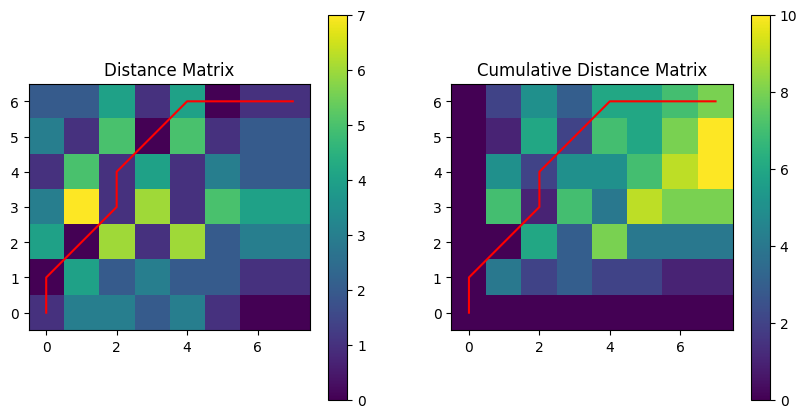

9.0


In [20]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def DTW(sequence1, sequence2):

    rows, cols = len(sequence1), len(sequence2)
    DTW_cumulate_Matrix = np.zeros((rows, cols))

    DTW_cumulate_Matrix[0, 0] = np.linalg.norm(sequence1[0] - sequence2[0])
    for i in range(1, rows):
        DTW_cumulate_Matrix[i, 0] = np.linalg.norm(sequence1[i] - sequence2[0]) + DTW_cumulate_Matrix[i - 1, 0]
    for j in range(1, cols):
        DTW_cumulate_Matrix[0, j] = np.linalg.norm(sequence1[0] - sequence2[j]) + DTW_cumulate_Matrix[0, j - 1]

    for i in range(1, rows):
        for j in range(1, cols):
            cost = np.linalg.norm(sequence1[i] - sequence2[j])
            DTW_cumulate_Matrix[i, j] = cost + min(
                DTW_cumulate_Matrix[i - 1, j],
                DTW_cumulate_Matrix[i - 1, j - 1],
                DTW_cumulate_Matrix[i, j - 1],
            )

    i, j = rows - 1, cols - 1
    optimal_path = [(i, j)]
    while i > 0 or j > 0:
        min_index = np.argmin(
            [DTW_cumulate_Matrix[i - 1, j], DTW_cumulate_Matrix[i - 1, j - 1], DTW_cumulate_Matrix[i, j - 1]]
        )
        if min_index == 0:
            i -= 1
        elif min_index == 1:
            i -= 1
            j -= 1
        else:
            j -= 1
        optimal_path.append((i, j))

    return DTW_cumulate_Matrix[-1,-1], np.array(optimal_path[::-1])



def plotDTWpath(sequence1, sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################

    # Convert sequence1 and sequence2 to one-dimensional arrays if they are not already
    sequence1 = np.asarray(sequence1).ravel()
    sequence2 = np.asarray(sequence2).ravel()

    # Initialize matrices for distance and cumulative distance
    distance_matrix = np.zeros((len(sequence1), len(sequence2)))
    DTW_cumulate_Matrix = np.zeros((len(sequence1), len(sequence2)))

    # Compute distance matrix
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            distance_matrix[i, j] = np.linalg.norm(sequence1[i] - sequence2[j])  # Absolute difference

    # Compute cumulative distance matrix
    for i in range(1, len(sequence1)):
        for j in range(1, len(sequence2)):
            current_distance = np.linalg.norm(sequence1[i] - sequence2[j])  # Absolute difference
            DTW_cumulate_Matrix[i, j] = current_distance + min(
                DTW_cumulate_Matrix[i - 1, j],
                DTW_cumulate_Matrix[i - 1, j - 1],
                DTW_cumulate_Matrix[i, j - 1],
            )

    # Obtain the optimal path using "DTW" function
    opt_distance, optimal_path = DTW(sequence1, sequence2)

    # Plot the optimal path on distance and cumulative matrices
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(distance_matrix, cmap="viridis", origin="lower")
    plt.title("Distance Matrix")
    plt.colorbar()
    # Extract x and y coordinates from the optimal path
    x_path, y_path = zip(*optimal_path)
    plt.plot(y_path, x_path, color="red")

    # Plot cumulative distance matrix
    plt.subplot(1, 2, 2)
    plt.imshow(DTW_cumulate_Matrix, cmap="viridis", origin="lower")
    plt.title("Cumulative Distance Matrix")
    plt.colorbar()
    plt.plot(y_path, x_path, color="red")

    plt.show()


sequence1 = np.array([4, 3, 7, 0, 2, 6, 5])
sequence2 = np.array([3, 7, 1, 6, 1, 5, 4, 4])

plotDTWpath(sequence1, sequence2)
d,_ = DTW(sequence1, sequence2)
print(d)




<dt> <b> Part (b): </b> In this part i tried to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> <br>



<dt> 1. Recorded one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine (provided as .wav files). </dt> <br>

<dt> 2. Recorded three further repetitions of the same digits (Isolated words) (provided as .wav files) as test data. </dt>   <br>

<dt> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are used. </dt> <br>
  
<dt> 4. Wrote an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> <br>

<dt> 5. Took two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plotted the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> <br>

<dt> 6. Evaluated the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> <br>

<dt> 7. Created a confusion matrix and reported the most confusing digits. </dt> <br>



In [1]:
import numpy as np
import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy


audio_Zero_2 = "Digit_audio/Zero/Zero_2.wav"
audio_Zero_1 = "Digit_audio/Zero/Zero_1.wav"
audio_Zero_3 = "Digit_audio/Zero/Zero_3.wav"
audio_Zero_4 = "Digit_audio/Zero/Zero_4.wav"

audio_One_1 = "Digit_audio/One/One_1.wav"
audio_One_2 = "Digit_audio/One/One_2.wav"
audio_One_3 = "Digit_audio/One/One_3.wav"
audio_One_4 = "Digit_audio/One/One_4.wav"

audio_Two_1 = "Digit_audio/Two/Two_1.wav"
audio_Two_2 = "Digit_audio/Two/Two_2.wav"
audio_Two_3 = "Digit_audio/Two/Two_3.wav"
audio_Two_4 = "Digit_audio/Two/Two_4.wav"

audio_Three_1 = "Digit_audio/Three/Three_1.wav"
audio_Three_2 = "Digit_audio/Three/Three_2.wav"
audio_Three_3 = "Digit_audio/Three/Three_is3.wav"
audio_Three_4 = "Digit_audio/Three/Three_4.wav"

audio_Four_1 = "Digit_audio/Four/Four_1.wav"
audio_Four_2 = "Digit_audio/Four/Four_2.wav"
audio_Four_3 = "Digit_audio/Four/Four_3.wav"
audio_Four_4 = "Digit_audio/Four/Four_4.wav"

audio_Five_1 = "Digit_audio/Five/Five_1.wav"
audio_Five_2 = "Digit_audio/Five/Five_2.wav"
audio_Five_3 = "Digit_audio/Five/Five_3.wav"
audio_Five_4 = "Digit_audio/Five/Five_4.wav"

audio_Six_1 = "Digit_audio/Six/Six_1.wav"
audio_Six_2 = "Digit_audio/Six/Six_2.wav"
audio_Six_3 = "Digit_audio/Six/Six_3.wav"
audio_Six_4 = "Digit_audio/Six/Six_4.wav"

audio_Seven_1 = "Digit_audio/Seven/Seven_1.wav"
audio_Seven_2 = "Digit_audio/Seven/Seven_2.wav"
audio_Seven_3 = "Digit_audio/Seven/Seven_3.wav"
audio_Seven_4 = "Digit_audio/Seven/Seven_4.wav"

audio_Eight_1 = "Digit_audio/Eight/Eight_1.wav"
audio_Eight_2 = "Digit_audio/Eight/Eight_2.wav"
audio_Eight_3 = "Digit_audio/Eight/Eight_3.wav"
audio_Eight_4 = "Digit_audio/Eight/Eight_4.wav"

audio_Nine_1 = "Digit_audio/Nine/Nine_1.wav"
audio_Nine_2 = "Digit_audio/Nine/Nine_2.wav"
audio_Nine_3 = "Digit_audio/Nine/Nine_3.wav"
audio_Nine_4 = "Digit_audio/Nine/Nine_4.wav"



digit_arrays_recognise = {
    "zero": audio_Zero_1,
    "one": audio_One_1,
    "four": audio_Four_1,
    "seven": audio_Seven_1,
    "three": audio_Three_1,
    "six": audio_Six_1,
    "nine": audio_Nine_1,
    "two": audio_Two_1,
    "five": audio_Five_1,
    "eight": audio_Eight_1
}

digit_arrays_test_1 = {
    "zero": audio_Zero_2,
    "two": audio_Two_2,
    "five": audio_Five_2,
    "eight": audio_Eight_2,
    "one": audio_One_2,
    "four": audio_Four_2,
    "seven": audio_Seven_2,
    "three": audio_Three_2,
    "six": audio_Six_2,
    "nine": audio_Nine_2
}

digit_arrays_test_2 = {
    "zero": audio_Zero_3,
    "two": audio_Two_3,
    "five": audio_Five_3,
    "eight": audio_Eight_3,
    "one": audio_One_3,
    "four": audio_Four_3,
    "seven": audio_Seven_3,
    "three": audio_Three_3,
    "six": audio_Six_3,
    "nine": audio_Nine_3
}

digit_arrays_test_3 = {
    "zero": audio_Zero_4,
    "two": audio_Two_4,
    "five": audio_Five_4,
    "eight": audio_Eight_4,
    "one": audio_One_4,
    "four": audio_Four_4,
    "seven": audio_Seven_4,
    "three": audio_Three_4,
    "six": audio_Six_4,
    "nine": audio_Nine_4
}

numbers = {
    "zero": 0,
    "two": 2,
    "five": 5,
    "eight": 8,
    "one": 1,
    "four": 4,
    "seven": 7,
    "three": 3,
    "six": 6,
    "nine": 9
}


def computeMFCC(audio_path, nfft=1103):
    rate, sig = wav.read(audio_path)
    sig = sig - np.mean(sig)
    mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming, nfft=nfft)
    mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
    return mfcc_feat_cmvn

audio_recognise = {}
audio_test_1 = {}
audio_test_2 = {}
audio_test_3 = {}

for digit_name, audio_path in digit_arrays_recognise.items():
    audio_recognise[digit_name] = computeMFCC(audio_path)
for digit_name, audio_path in digit_arrays_test_1.items():
    audio_test_1[digit_name] = computeMFCC(audio_path)
for digit_name, audio_path in digit_arrays_test_2.items():
    audio_test_2[digit_name] = computeMFCC(audio_path)
for digit_name, audio_path in digit_arrays_test_3.items():
    audio_test_3[digit_name] = computeMFCC(audio_path)




[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Algorithm to perform isolated digit recognition**

In [ ]:
def isolatedDigitRecognition(test_audio):
    # Compare test template with templates of all digits
    distances = []
    for digit_name, digit_audio_path in digit_arrays_recognise.items():
        distance, _ = DTW(test_audio, audio_recognise[digit_name])  # Compute DTW distance
        distances.append((digit_name, distance))

    # Identify the digit with the minimum DTW distance
    recognized_digit, min_distance = min(distances, key=lambda x: x[1])
    return recognized_digit, min_distance

recognized_digit, min_distance = isolatedDigitRecognition(audio_test_1["three"])
print(f"Recognized digit: {recognized_digit}, Min Distance: {min_distance}")



Recognized digit: three, Min Distance: 6974.343165397644


**Plot the optimal DTW path**

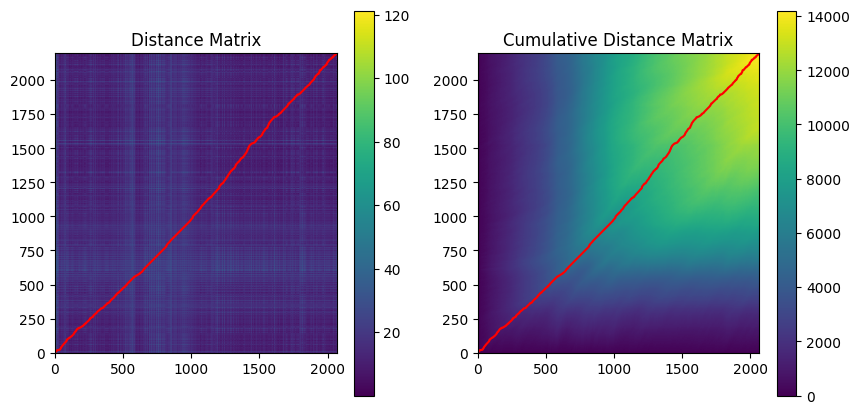

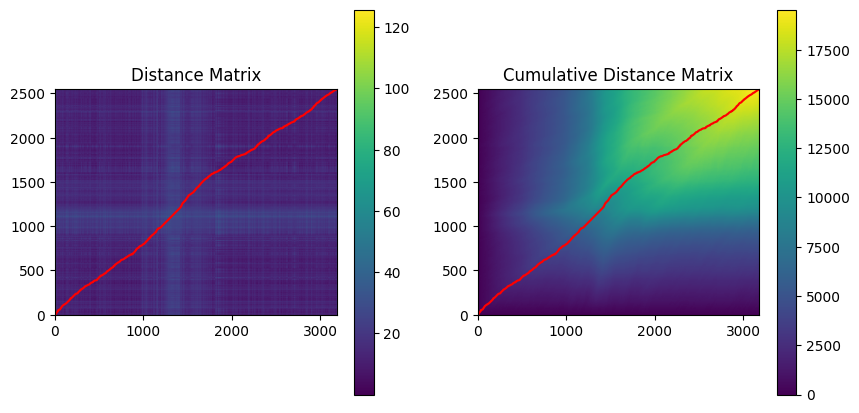

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

plotDTWpath(audio_test_1["zero"], audio_test_2["zero"])
plotDTWpath(audio_test_1["five"], audio_recognise["zero"])



**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [16]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

correct = 0
confusion = np.zeros((10,10))

for digit_name, digit_audio_path in digit_arrays_test_1.items():
    recognized_digit, min_distance = isolatedDigitRecognition(audio_test_1[digit_name])
    confusion[numbers[digit_name], numbers[recognized_digit]] += 1
    if recognized_digit == digit_name:
        correct+=1

for digit_name, digit_audio_path in digit_arrays_test_2.items():
    recognized_digit, min_distance = isolatedDigitRecognition(audio_test_2[digit_name])
    confusion[numbers[digit_name], numbers[recognized_digit]] += 1
    if recognized_digit == digit_name:
        correct+=1

for digit_name, digit_audio_path in digit_arrays_test_3.items():
    recognized_digit, min_distance = isolatedDigitRecognition(audio_test_3[digit_name])
    confusion[numbers[digit_name], numbers[recognized_digit]] += 1
    if recognized_digit == digit_name:
        correct+=1

print("accuracy of recognition is ", correct/30)

print("the confusion matrix is : \n", confusion)


accuracy of recognition is  0.6666666666666666
the confusion matrix is : 
 [[0. 0. 0. 2. 0. 0. 0. 0. 1. 0.]
 [0. 3. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]


<b> Observations </b>

1. The most confused digit is eight as it is being wrongly predicted the most times.

2. 0, 5 and 6 has the lowest correct predictions.

3. In the above distance plot, it gives a more straight diagonalised path for same numbers and diverted paths with more distance for greater numbers.




<dt> <h4> <b> Part (c): </b> In this part i tried to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluated the performance of digit recognition systems on the TDGIT database (shared above). </dt> </h4>
<dt> <h4> 2. Evaluated the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Suggested changes to improve the system performance. </dt> </h4>

In [14]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

correct = 0

def isolatedDigitRecognition_2(test_audio, speaker):
    # Compare test template with templates of all digits
    distances = []
    for digit_name, digit_audio_path in digit_arrays_recognise.items():
        distance, _ = DTW(test_audio, computeMFCC(f'{speaker}/{numbers[digit_name]}_{speaker}_0.wav'))  # Compute DTW distance
        distances.append((digit_name, distance))

    # Identify the digit with the minimum DTW distance
    recognized_digit, min_distance = min(distances, key=lambda x: x[1])
    return recognized_digit, min_distance


for i in range(1,50):
    for j in range(10):
        file = f'theo/{j}_theo_{i}.wav'

        mfcc_template = computeMFCC(file)
        recognized_digit, min_distance = isolatedDigitRecognition_2(mfcc_template, "theo")

        if j == numbers[recognized_digit]:
                correct += 1

print("accuracy of theo with theo is: ", correct/490)

correct=0

for i in range(1,50):
    for j in range(10):
        file = f'jackson/{j}_jackson_{i}.wav'

        mfcc_template = computeMFCC(file)
        recognized_digit, min_distance = isolatedDigitRecognition_2(mfcc_template, "jackson")


        if j == numbers[recognized_digit]:
            correct += 1


print("accuracy of jackson with jackson is: ", correct/490)

correct=0

for i in range(1,50):
    for j in range(10):
        file = f'nicolas/{j}_nicolas_{i}.wav'

        mfcc_template = computeMFCC(file)
        recognized_digit, min_distance = isolatedDigitRecognition_2(mfcc_template, "nicolas")


        if j == numbers[recognized_digit]:
            correct += 1

print("accuracy of nicolas with nicolas is: ", correct/490)

correct=0

for i in range(1,50):
    for j in range(10):
        file = f'yweweler/{j}_yweweler_{i}.wav'

        mfcc_template = computeMFCC(file)
        recognized_digit, min_distance = isolatedDigitRecognition_2(mfcc_template, "yweweler")


        if j == numbers[recognized_digit]:
            correct += 1

print("accuracy of yweweler with yweweler is: ", correct/490)

#########################################################################################################

correct=0

for i in range(50):
    for j in range(10):
        file = f'yweweler/{j}_yweweler_{i}.wav'

        mfcc_template = computeMFCC(file)
        recognized_digit, min_distance = isolatedDigitRecognition_2(mfcc_template, "theo")


        if j == numbers[recognized_digit]:
            correct += 1

for i in range(50):
    for j in range(10):
        file = f'jackson/{j}_jackson_{i}.wav'

        mfcc_template = computeMFCC(file)
        recognized_digit, min_distance = isolatedDigitRecognition_2(mfcc_template, "theo")


        if j == numbers[recognized_digit]:
            correct += 1


for i in range(50):
    for j in range(10):
        file = f'nicolas/{j}_nicolas_{i}.wav'

        mfcc_template = computeMFCC(file)
        recognized_digit, min_distance = isolatedDigitRecognition_2(mfcc_template, "theo")


        if j == numbers[recognized_digit]:
            correct += 1

print("accuracy of nicolas, yweweler and jackson with theo as reference is: ", correct/1500)



accuracy of theo with theo is:  0.9428571428571428
accuracy of jackson with jackson is:  0.8285714285714286
accuracy of nicolas with nicolas is:  0.7673469387755102
accuracy of yweweler with yweweler is:  0.7142857142857143
accuracy of nicolas, yweweler and jackson with theo as reference is:  0.464


<b> Observations </b>

1. Theo has the best accuracy while predicting with the person's own voice.

2. Yweweler has the lowest self accuracy among all, still its a descent accuracy.

3. But when we predicted the digit voices of nicolas, jackson and yweweler with theo as reference, the accuracy decreases.

4. To improve the system performance we should upgrade the audio quality and try to get the voice of the same speaker for reference.

